#### **My NBs - Giuseppe Longo**

# Exercise 1.

## Autoencoders: three simple examples

Python notebook from <a href="https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%203%20-%20Autoencoders.ipynb" target="_blank"> Arden Dertat   </a>


### Group: insert here the names of the members

In [23]:
#!python3 -m pip install seaborn

In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

#### Insert here (in this cell) your explanation of how the class from_future__import works

**Defining plot utilities**

In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()



**defining Loss and comparing routines**

In [ ]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()

In [3]:
warnings.filterwarnings('ignore')

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)
(60000, 784)
(10000, 784)

(60000, 784)
(10000, 784)


(10000, 784)

### 1 Standard autoencoder. Small code layer.

We will now implement an autoencoder where the hyperparameters are: 128 nodes in the hidden layer, code size is 32, and binary crossentropy is the loss function.

**Notice that you are using the Keras functional API (and not sequential)**. Refer to <a href="https://keras.io/guides/functional_api/" target="_blank">this guide</a> for details. It’s more verbose but a more flexible way to define complex models. 

We can easily grab parts of our model, for example only the decoder, and work with that. 

The output of Dense method is a callable layer, using the functional API we provide it with the input and store the output. The output of a layer becomes the input of the next layer. With the sequential API the add method implicitly handled this for us.. 

#### Understand the difference between functional API and sequential. Write it here

In [5]:
input_size = 784           # number of neurons in input
hidden_size = 128          # number of neurons in hidden layer
code_size = 32             # number of neurons in the central layer (output of encoder)

input_img = Input(shape=(input_size,))                          # builds imput layer 
hidden_1 = Dense(hidden_size, activation='relu')(input_img)     # builds hidden layer
code = Dense(code_size, activation='relu')(hidden_1)            # build encoder output
hidden_2 = Dense(hidden_size, activation='relu')(code)          # first layer decoder
output_img = Dense(input_size, activation='sigmoid')(hidden_2)  # output layer decoder

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

At this point the model is ready and compiled. Notice that when we run it we use x_train, X_train and not x_train, y_train as in ANN. The output of an autoencoder is the same as the input (the only real requirement!).

In [6]:
autoencoder.fit(x_train, x_train, epochs=3)
#model.summary()

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1447
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1058
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0997


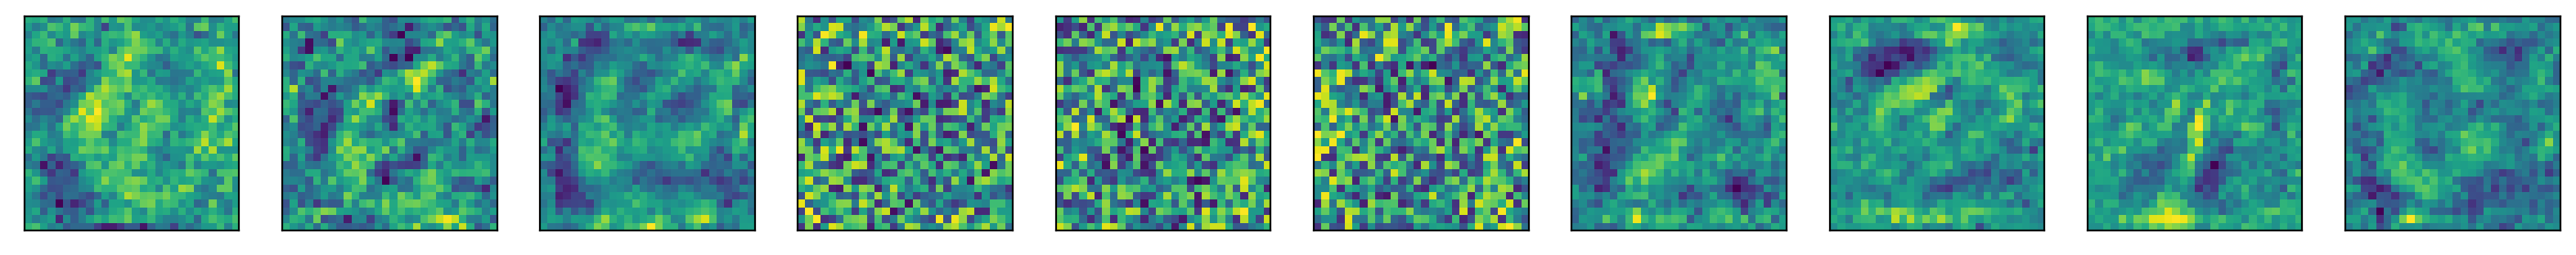

In [7]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


313/313 [==============================] - 1s 3ms/step


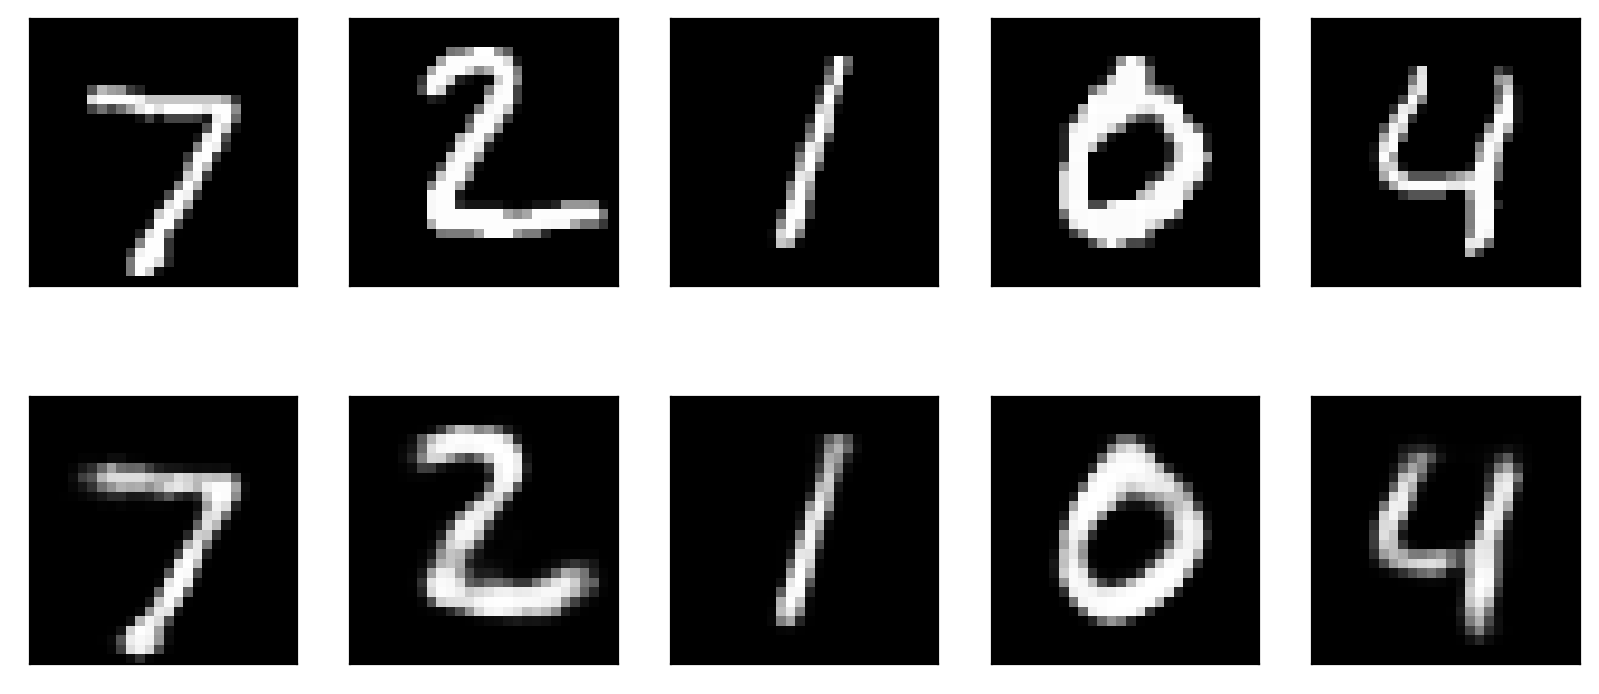

In [8]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

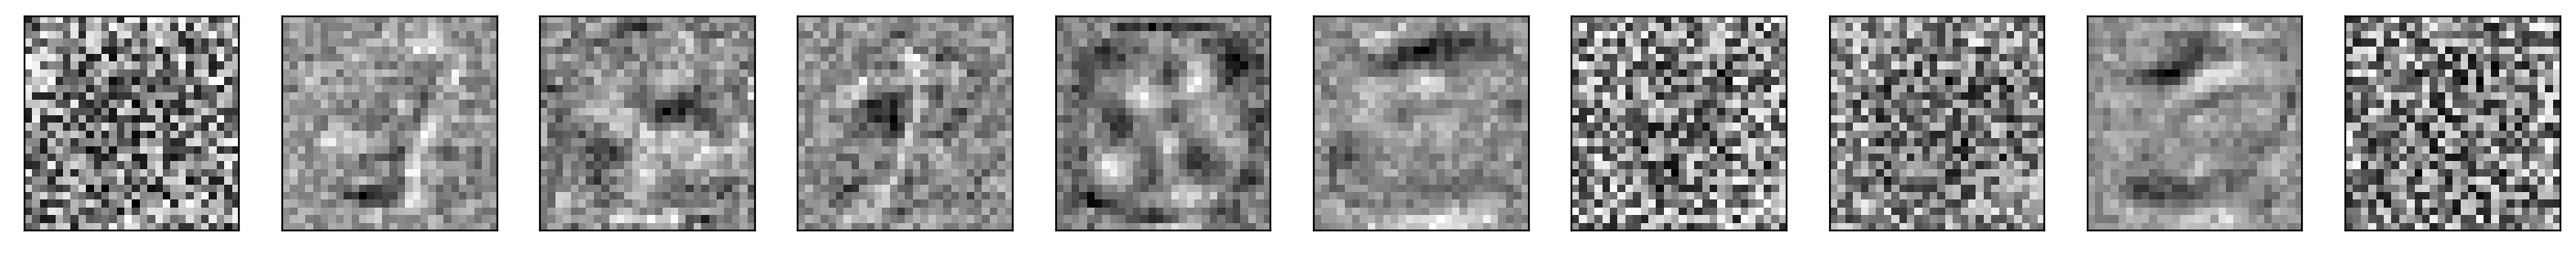

In [9]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+20].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#### Discuss the above  plots

## 2. Denoising Autorncoder

First of all let us create a noisy NMIST dataset

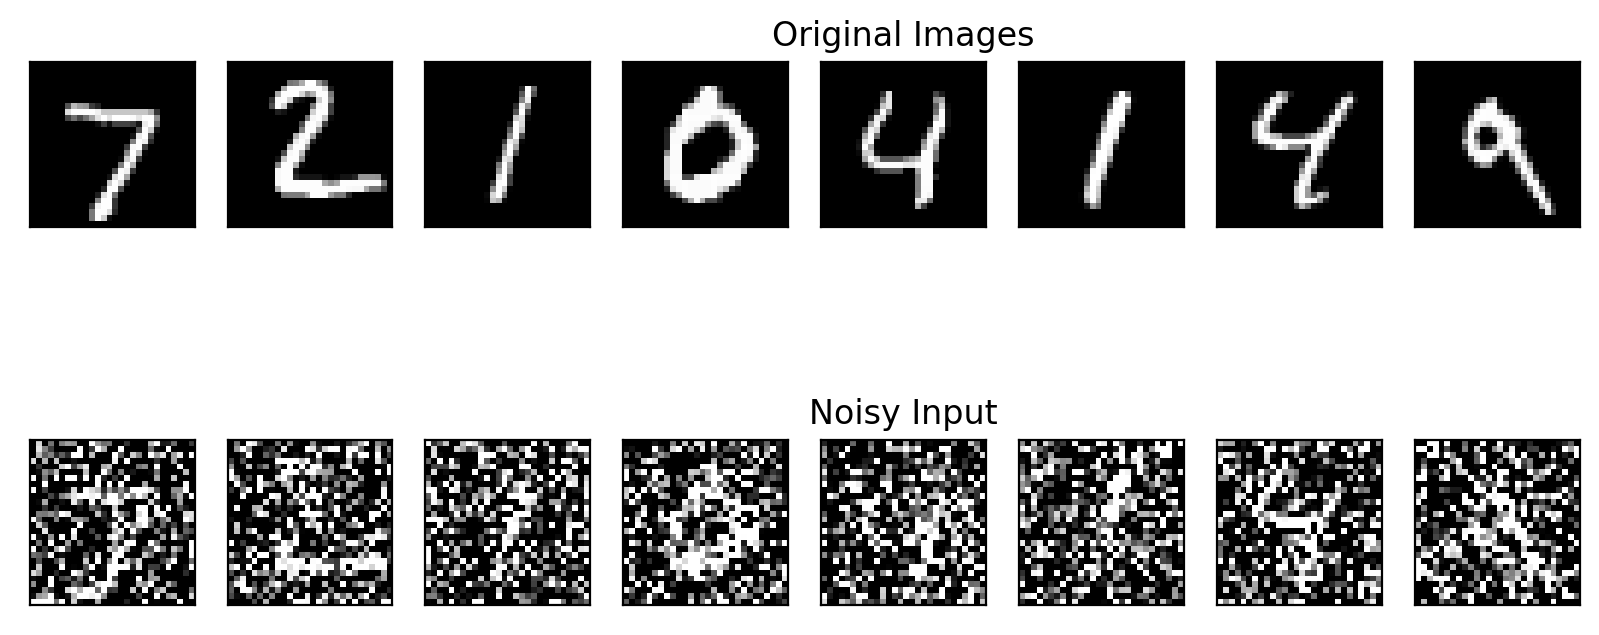

In [25]:
noise_factor = 0.90
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 8
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

#### Experiment changing the noise level and discuss the results
Find the noise level at which the AC starts failing

In the following model, please notice that the call is autoencoder.fits(x_train_noisy, **x_train**) at a difference of what we have done in the previous model. 

In [11]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1994
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1683
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1611
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1571
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1544
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1524
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1509
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1496
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1484
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1475


313/313 [==============================] - 1s 3ms/step


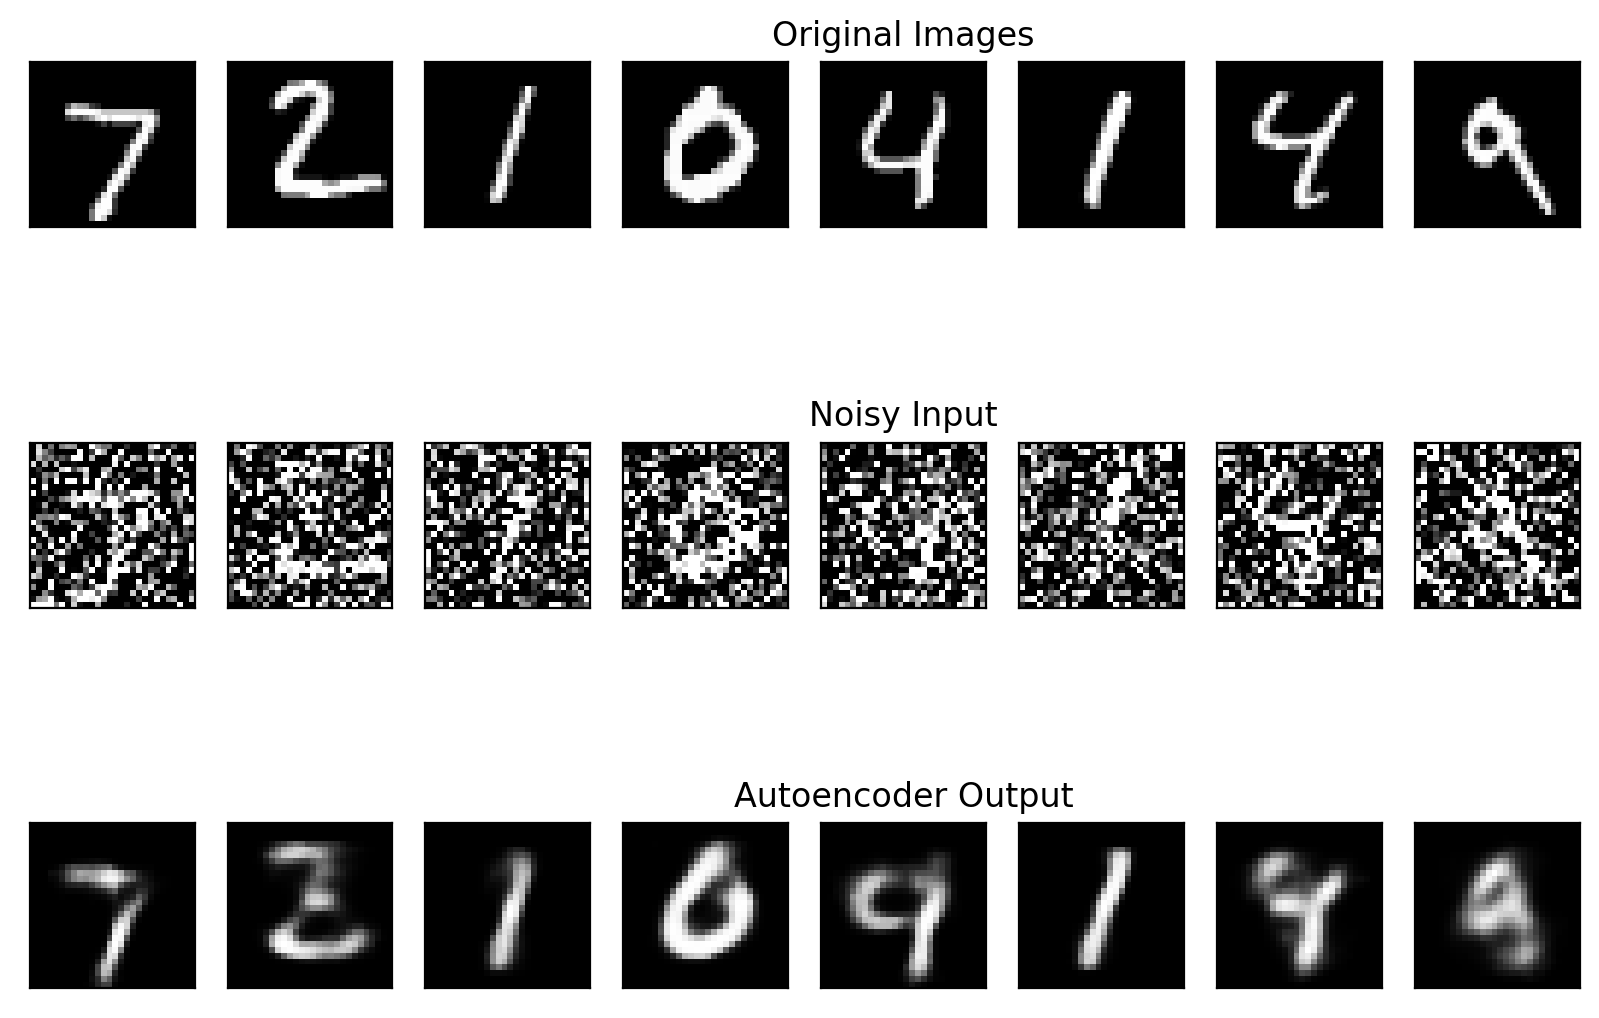

In [26]:
n = 8
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')


Remember that the autoencoder has never received as imputs the original images. It only used them to constrain the weight configuration. 

## 3. Sparse autoencoders

As a reminder, previously we created the code layer as follows: code = Dense(code_size, activation='relu')(input_img)
We now add another parameter called activity_regularizer by specifying the regularization strength. This is typically a value in the range $\[0.001, 0.000001\]$. 
Here we chose 10e-6.
The command then becomes: 
code = Dense(code_size, activation='relu', activity_regularizer=l1(10e-6))(input_img)
As we shall see, the final loss of the sparse model is 0.01 higher than the standard one, due to the added regularization term.

To allow comparison we first run a standard autoencoder and then a sparse autoencoder

##### Standard autoencoder

In [13]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_standard = Model(input_img, output_img)
autoencoder_standard.compile(optimizer='adam', loss='binary_crossentropy')
history_standard = autoencoder_standard.fit(x_train, x_train, epochs=20)

encoded_standard = Model(input_img, code)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1613
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1039
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0964
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0949
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0939
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0938
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0937
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936
Epoch 11/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936
Epoch 12/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935
E

#### Visualize the results of the standard autoencoder

##### Sparse autoencoder

In [15]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu', activity_regularizer=l1(10e-6))(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder_regularized = Model(input_img, output_img)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')
history_regularized = autoencoder_regularized.fit(x_train, x_train, epochs=20)

encoded_regularized = Model(input_img, code)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1626
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1053
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0982
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0969
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0964
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0960
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0958
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0956
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0954
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0953
Epoch 11/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0951
Epoch 12/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0950
E

313/313 [==============================] - 0s 1ms/step


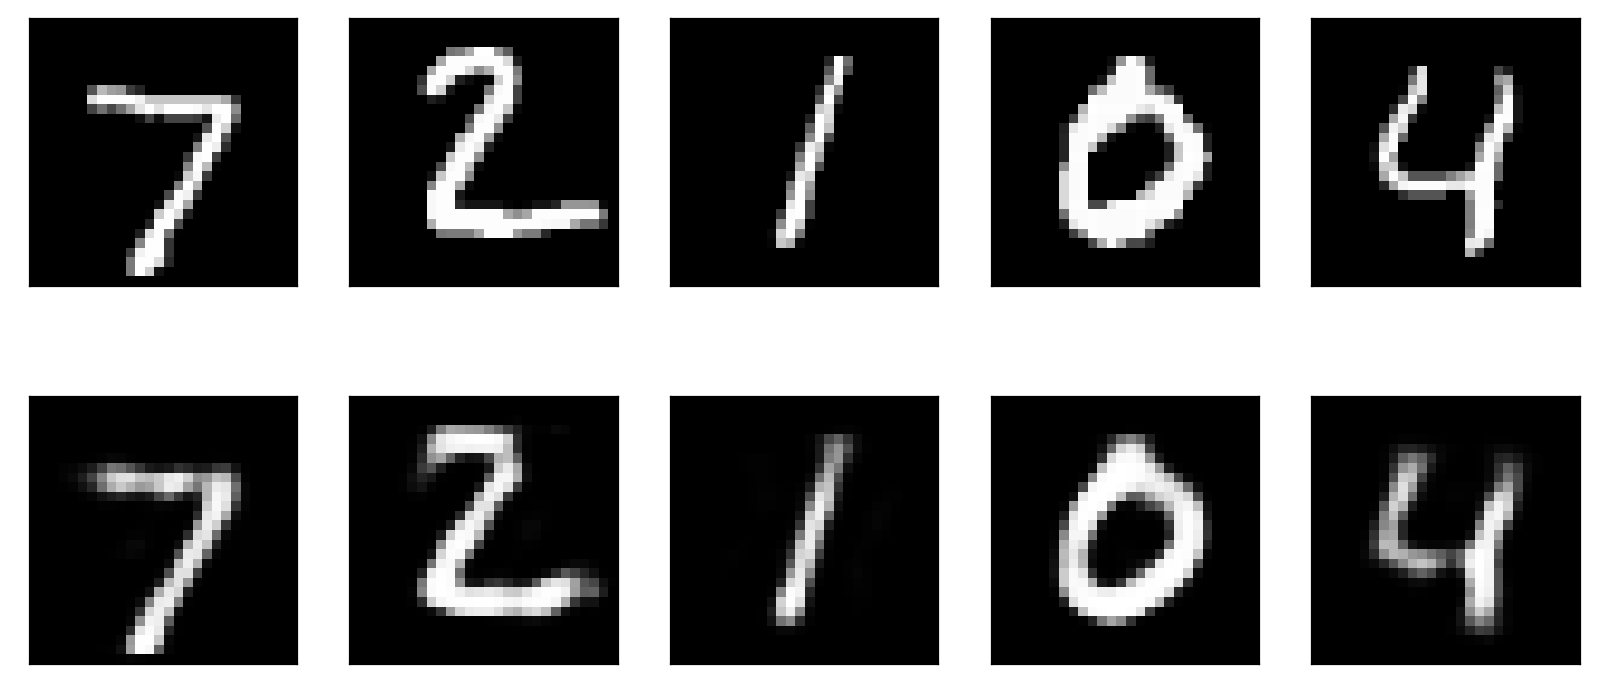

In [16]:
plot_autoencoder_outputs(autoencoder_regularized, 5, (28, 28))

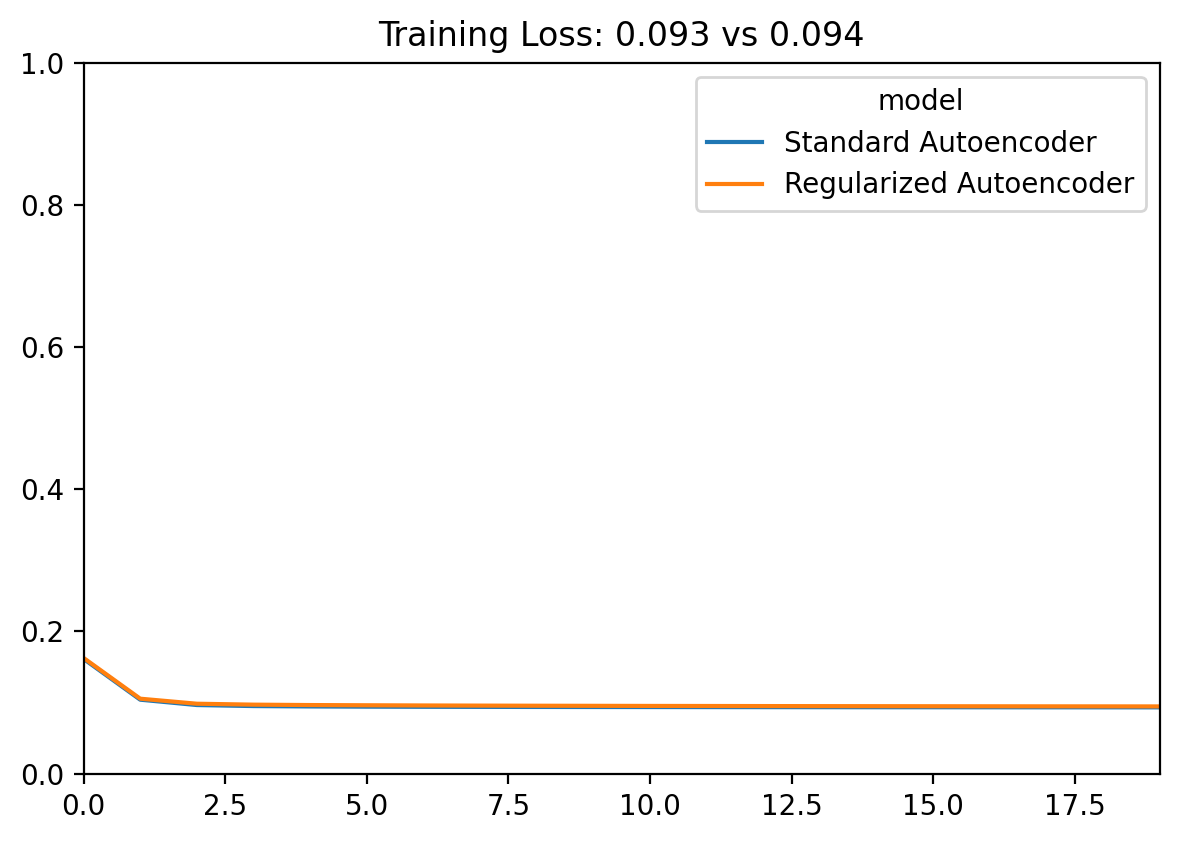

In [17]:
plot_compare_histories([history_standard, history_regularized], 
                       ['Standard Autoencoder', 'Regularized Autoencoder'], plot_accuracy=False)

In [18]:
autoencoder_standard.evaluate(x_test, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919


0.09194997698068619

In [19]:
autoencoder_regularized.evaluate(x_test, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0933


0.09325583279132843

In [20]:
print(encoded_standard.predict(x_test).mean())
print(encoded_regularized.predict(x_test).mean())

313/313 [==============================] - 0s 1ms/step
6.6041045
313/313 [==============================] - 0s 1ms/step
4.338792


Let’s demonstrate the encodings generated by the regularized model are indeed sparse. If we look at the histogram of code values for the images in the test set, the distribution is as follows

313/313 [==============================] - 0s 797us/step


<AxesSubplot:ylabel='Density'>

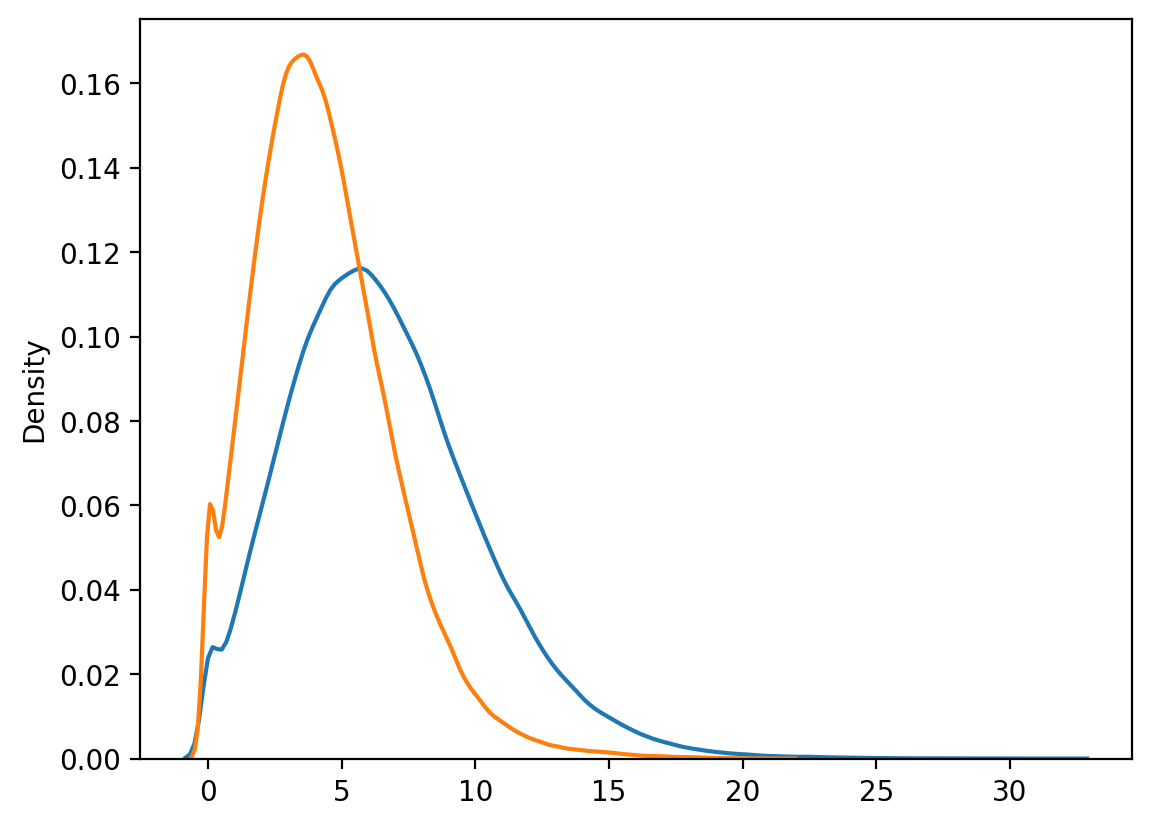

In [21]:
standard_scores = encoded_standard.predict(x_test).ravel()
regularized_scores = encoded_regularized.predict(x_test).ravel()
sns.distplot(standard_scores, hist=False, label='standard model')
sns.distplot(regularized_scores, hist=False, label='regularized model')

<AxesSubplot:ylabel='Density'>

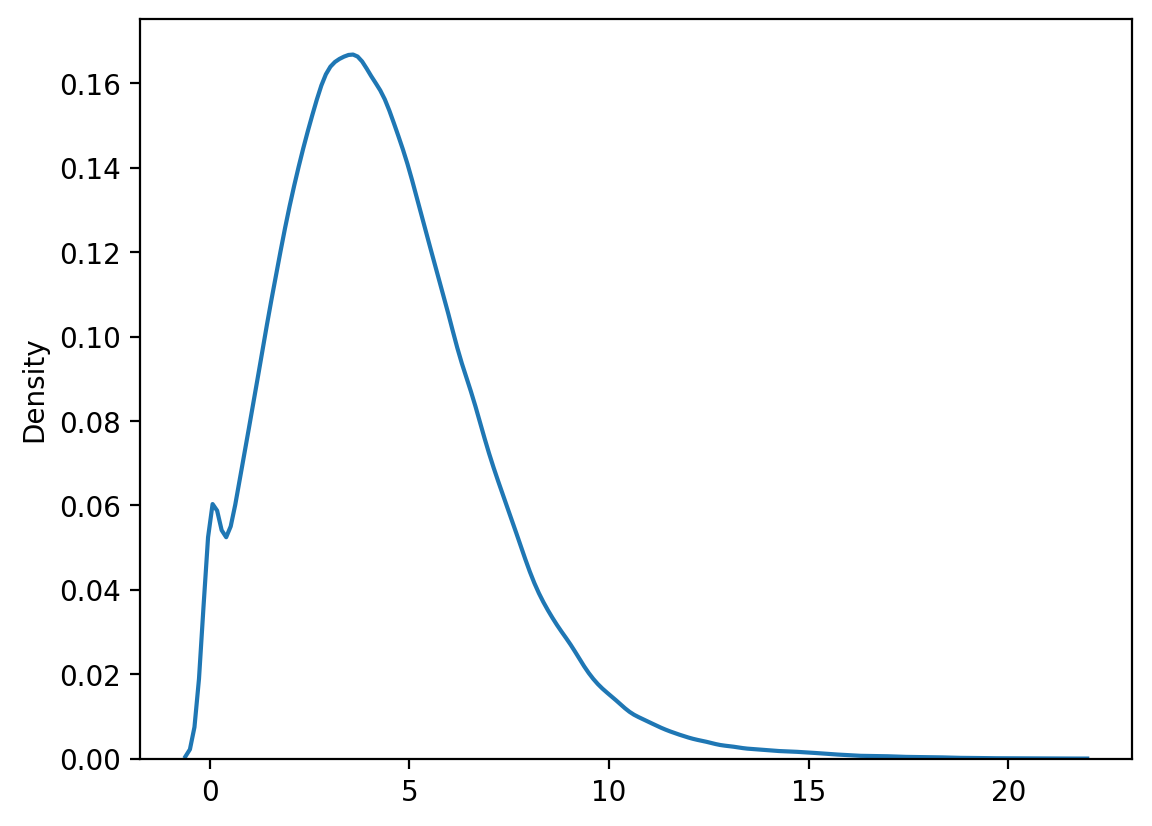

In [27]:
sns.distplot(regularized_scores, hist=False, label='regularized model')

#### Explain the results